##### 1. Import all the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from parser import read_controls, read_articles
from language_models import translate, embed
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, AutoModel
%load_ext autoreload
%autoreload 2

2025-01-14 15:00:45.182 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-01-14 15:00:45.183 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-01-14 15:00:46.854 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-01-14 15:00:46.854 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager


##### 2. Define paths to input files, initialize translation and embedding models

In [2]:
document_path = './documents'
control_path = f'{document_path}/Internal_Controls.docx'
articles_path = f'{document_path}/finma rs 2023 01 20221207.pdf'
models_path = './models'

translation_model_name = 'Helsinki-NLP/opus-mt-de-en'
translation_tokenizer = AutoTokenizer.from_pretrained(translation_model_name)
translation_model = AutoModelForSeq2SeqLM.from_pretrained(f'{models_path}/{translation_model_name}')

# embedding_model_name = 'Snowflake/snowflake-arctic-embed-m-long'
embedding_model_name = 'Alibaba-NLP/gte-base-en-v1.5'
embedding_tokenizer = AutoTokenizer.from_pretrained(embedding_model_name)
# embedding_model = AutoModel.from_pretrained(f'{models_path}/{embedding_model_name}', trust_remote_code=True, add_pooling_layer=False, safe_serialization=True)
embedding_model = AutoModel.from_pretrained(f'{models_path}/{embedding_model_name}', trust_remote_code=True, add_pooling_layer=False)
embedding_model.eval()

/Users/slavakarpii/.pyenv/versions/3.12.7/envs/test/lib/python3.12/site-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


NewModel(
  (embeddings): NewEmbeddings(
    (word_embeddings): Embedding(30528, 768, padding_idx=0)
    (rotary_emb): NTKScalingRotaryEmbedding()
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): NewEncoder(
    (layer): ModuleList(
      (0-11): 12 x NewLayer(
        (attention): NewSdpaAttention(
          (qkv_proj): Linear(in_features=768, out_features=2304, bias=True)
          (dropout): Dropout(p=0.0, inplace=False)
          (o_proj): Linear(in_features=768, out_features=768, bias=True)
        )
        (mlp): NewGatedMLP(
          (up_gate_proj): Linear(in_features=768, out_features=6144, bias=False)
          (down_proj): Linear(in_features=3072, out_features=768, bias=True)
          (act_fn): GELUActivation()
          (hidden_dropout): Dropout(p=0.1, inplace=False)
        )
        (attn_ln): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (mlp_ln): LayerNorm((768,), eps=1

##### 3. Load the input files using helper parsing functions

In [3]:
df_controls = read_controls(control_path)
df_articles = read_articles(articles_path) 

2025-01-14 15:00:48.141 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-01-14 15:00:48.141 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-14 15:00:48.197 
  command:

    streamlit run /Users/slavakarpii/.pyenv/versions/3.12.7/envs/test/lib/python3.12/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-01-14 15:00:48.198 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-14 15:00:48.198 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-14 15:00:48.205 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-14 15:00:48.206 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-14 

In [4]:
df_controls

,id,text
0,CYR-001,Multi-Factor Authentication (MFA) Implementati...
1,CYR-002,Regular Vulnerability Assessments. Conduct mon...
2,CYR-003,Endpoint Protection and Monitoring. Deploy end...
3,CYR-004,Cyber Incident Response Plan (CIRP). Maintain ...
4,CYR-005,Secure Configuration Baselines. Establish and ...
5,CYR-006,Data Encryption and Key Management. Ensure tha...
6,CYR-007,Access Privilege Reviews. Conduct quarterly re...
7,CYR-008,Cybersecurity Awareness Training. Provide mand...
8,CYR-009,Network Segmentation. Implement network segmen...
9,CYR-010,Third-Party Cyber Risk Management. Require all...


##### 4. Translate the articles from German to English

In [5]:
df_articles = translate(df_articles, 'text', translation_tokenizer, translation_model)
df_articles

2025-01-14 15:00:49.353 No runtime found, using MemoryCacheStorageManager
2025-01-14 15:00:49.355 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-14 15:00:49.356 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-14 15:00:49.356 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-14 15:00:49.861 Thread 'Thread-6': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-14 15:00:49.862 Thread 'Thread-6': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-14 15:02:25.514 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-14 15:02:25.514 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


,chapter,section,subsection,text,id,translated_text
0,I. Gegenstand und Geltungsbereich.,-,-,I. Gegenstand und Geltungsbereich.\nDieses Run...,I,I. Subject matter and scope. This circular ref...
1,II. Begriffe.,-,-,II. Begriffe.\nOperationelle Risiken sind in A...,II,II. Terms. Operational risks are defined in Ar...
2,III. Proportionalitätsprinzip.,-,-,III. Proportionalitätsprinzip.\nDieses Rundsch...,III,III. Proportionality principle. This circular ...
3,IV. Management der operationellen Risiken.,A. Übergreifendes Management der operationelle...,-,A. Übergreifendes Management der operationelle...,IV.A,A. Extensive management of operational risks. ...
4,IV. Management der operationellen Risiken.,B. Management der IKT-Risiken.,a) IKT-Strategie und Governance.,a) IKT-Strategie und Governance.\nDie grundsät...,IV.B.a,a) ICT strategy and governance. The basic expe...
5,IV. Management der operationellen Risiken.,B. Management der IKT-Risiken.,b) Änderungsmanagement (Change Management).,b) Änderungsmanagement (Change Management).\nF...,IV.B.b,b) Change Management. For all stages of the de...
6,IV. Management der operationellen Risiken.,B. Management der IKT-Risiken.,"c) IKT-Betrieb (Run, Maintenance).","c) IKT-Betrieb (Run, Maintenance).\nDas Instit...",IV.B.c,"(c) ICT operation (run, maintenance). The Inst..."
7,IV. Management der operationellen Risiken.,B. Management der IKT-Risiken.,d) Vorfallmanagement (Incident Management).,d) Vorfallmanagement (Incident Management).\nD...,IV.B.d,d) Incident Management. The Institute has proc...
8,IV. Management der operationellen Risiken.,C. Management der Cyber-Risiken.,-,C. Management der Cyber-Risiken.\nDie grundsät...,IV.C,C. Cyber risk management. The basic expectatio...
9,IV. Management der operationellen Risiken.,D. Management der Risiken kritischer Daten.,-,D. Management der Risiken kritischer Daten.\nD...,IV.D,D. Management of the risks of critical data. T...


##### 5. Embed the control descriptions and translated articles into the same latent vector sapce

In [6]:
df_controls = embed(df_controls, 'text', embedding_tokenizer, embedding_model, is_query=False)
df_articles = embed(df_articles, 'translated_text', embedding_tokenizer, embedding_model, is_query=False)

2025-01-14 15:02:25.535 No runtime found, using MemoryCacheStorageManager
2025-01-14 15:02:25.536 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-14 15:02:25.537 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-14 15:02:25.537 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-14 15:02:25.762 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-14 15:02:25.762 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-14 15:02:25.765 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-14 15:02:25.765 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-14 15:02:25.765 Thread 'MainThread':

##### 6. Calculate the similarities between control and article embeddings and compute average similarity across all pairs.

In [7]:
similarities = np.array(df_articles['translated_text_embedding'].to_list()) @ np.array(df_controls['text_embedding'].to_list()).T
average = similarities.mean()
percentage = 0.8
threshold = np.quantile(similarities, percentage)

##### 7. Plot the distribution of similarities

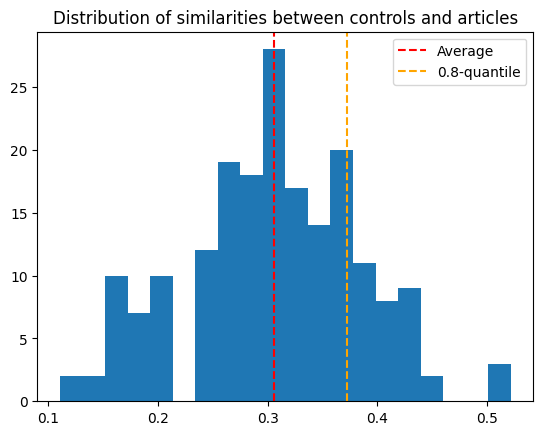

In [8]:
plt.hist(similarities.flatten(), bins=20)
plt.axvline(average, c='r', linestyle='--', label='Average')
plt.axvline(threshold, c='orange', linestyle='--', label=f'{percentage}-quantile')
plt.legend()
plt.title('Distribution of similarities between controls and articles')
plt.show()

##### 8. Plot all similarities as a heatmap

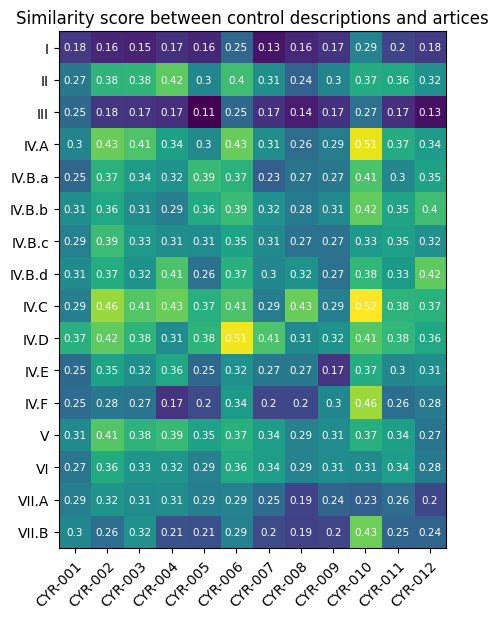

In [9]:
fig, ax = plt.subplots(figsize=(5,7))
im = ax.imshow(similarities)
ax.set_xticks(range(len(df_controls)), labels=df_controls['id'], rotation=45, ha='right', rotation_mode='anchor')
ax.set_yticks(range(len(df_articles)), labels=df_articles['id'])
for i in range(len(df_articles)):
    for j in range(len(df_controls)):
        text = ax.text(j, i, np.round(similarities[i, j], 2), ha='center', va='center', color='w', size=7.5)
ax.set_title('Similarity score between control descriptions and artices')
plt.show()

##### 9. Create a discrete similarity score (similar/not similar) by setting the 0.8 quantile of all similarities as a threshold

In [10]:
binary_similarities = np.where(similarities > threshold, 1, 0)

##### 10. Plot the discrete similarity scores for all pairs as a heatmap

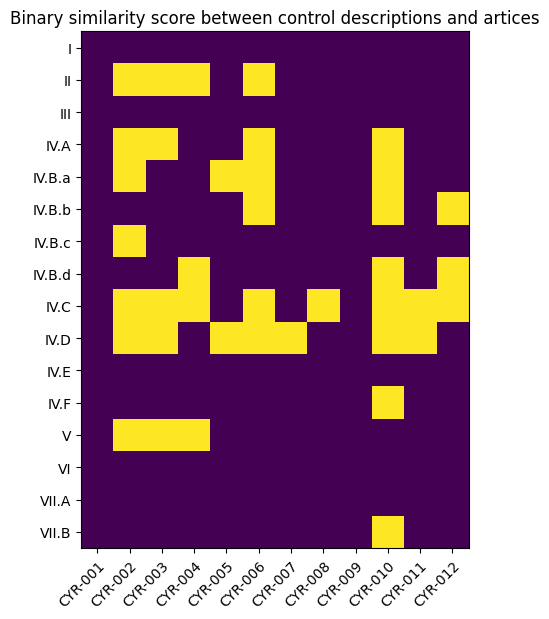

In [11]:
fig, ax = plt.subplots(figsize=(5,7))
im = ax.imshow(binary_similarities)
ax.set_xticks(range(len(df_controls)), labels=df_controls['id'], rotation=45, ha='right', rotation_mode='anchor')
ax.set_yticks(range(len(df_articles)), labels=df_articles['id'])
ax.set_title('Binary similarity score between control descriptions and artices')
plt.show()

##### 11. Produce the list of articles that are not sufficiently covered by controls. The criteria is - articles that have less than average number of similar controls

In [12]:
average_coverage = binary_similarities.sum(axis=1).mean()
df_articles['number_of_controls'] = binary_similarities.sum(axis=1) 
df_articles['is_covered'] =  (df_articles['number_of_controls'] >= average_coverage)
poorly_covered_articles = df_articles[~df_articles['is_covered']]
poorly_covered_articles[['chapter', 'section', 'subsection', 'text', 'number_of_controls']]

,chapter,section,subsection,text,number_of_controls
0,I. Gegenstand und Geltungsbereich.,-,-,I. Gegenstand und Geltungsbereich.\nDieses Run...,0
2,III. Proportionalitätsprinzip.,-,-,III. Proportionalitätsprinzip.\nDieses Rundsch...,0
6,IV. Management der operationellen Risiken.,B. Management der IKT-Risiken.,"c) IKT-Betrieb (Run, Maintenance).","c) IKT-Betrieb (Run, Maintenance).\nDas Instit...",1
10,IV. Management der operationellen Risiken.,E. Business Continuity Management (BCM).,-,E. Business Continuity Management (BCM).\nDie ...,0
11,IV. Management der operationellen Risiken.,F. Management der Risiken aus dem grenzübersch...,-,F. Management der Risiken aus dem grenzübersch...,1
13,VI. Weiterführung von kritischen Dienstleistun...,-,-,VI. Weiterführung von kritischen Dienstleistun...,0
14,VII. Übergangsbestimmungen.,A. Betreffend die Sicherstellung der operation...,-,A. Betreffend die Sicherstellung der operation...,0
15,VII. Übergangsbestimmungen.,B. Betreffend die Eigenmittelanforderungen für...,-,B. Betreffend die Eigenmittelanforderungen für...,1


##### 12. Produce a mapping between controls and relevant articles

In [13]:
df_controls['relevant_article_indexes'] = [[i for i, bin_sim in enumerate(bin_sim_list) if bin_sim] for bin_sim_list in binary_similarities.T]
df_controls['relevant_articles'] = df_controls['relevant_article_indexes'].apply(
    lambda x: df_articles.iloc[x]['id'].to_list()
)
df_controls['number_of_relevant_articles'] = df_controls['relevant_articles'].map(len)
df_controls[['id', 'text', 'relevant_articles', 'number_of_relevant_articles']]

,id,text,relevant_articles,number_of_relevant_articles
0,CYR-001,Multi-Factor Authentication (MFA) Implementati...,[],0
1,CYR-002,Regular Vulnerability Assessments. Conduct mon...,"[II, IV.A, IV.B.a, IV.B.c, IV.C, IV.D, V]",7
2,CYR-003,Endpoint Protection and Monitoring. Deploy end...,"[II, IV.A, IV.C, IV.D, V]",5
3,CYR-004,Cyber Incident Response Plan (CIRP). Maintain ...,"[II, IV.B.d, IV.C, V]",4
4,CYR-005,Secure Configuration Baselines. Establish and ...,"[IV.B.a, IV.D]",2
5,CYR-006,Data Encryption and Key Management. Ensure tha...,"[II, IV.A, IV.B.a, IV.B.b, IV.C, IV.D]",6
6,CYR-007,Access Privilege Reviews. Conduct quarterly re...,[IV.D],1
7,CYR-008,Cybersecurity Awareness Training. Provide mand...,[IV.C],1
8,CYR-009,Network Segmentation. Implement network segmen...,[],0
9,CYR-010,Third-Party Cyber Risk Management. Require all...,"[IV.A, IV.B.a, IV.B.b, IV.B.d, IV.C, IV.D, IV....",8


##### 13. Conclusions
Though the results look reasonable, a more thorough analysis is needed to determine whether the final relevancy relationships indeed make sense. In order to do so, ideally a closer examination of the content of each article by a expert in the regulatory domain is required, to find false positives and false negatives. Upon this inspection the following courses of action may be taken:
1. Tune the similarity threshold that determines relevancy
2. Explore a different embedding model (perhaps one specifically trained on this domain)
3. Combine multiple vector modes to get a fusion score (eg add a lexical model like TF-IDF)
4. Implement a chunking strategy to ensure that facts don't get dilluted by long context in some articles
5. Rethink the approach entirely:
    - Translate the control descriptions to German and find a German embedding model
    - For every article rephrase it using a generative model to achieve higher vocabulary and grammar variability and run the similarity search on every version of the article text
    - Rely completely on a generative model by passing each article - control pair in a prompt asking to determine whether they are relevant to one another.